In [1]:
import pandas as pd

A = pd.read_csv("A.csv").values
import numpy as np

x = np.array(A[:, 0:3].astype(np.float32))
x = np.hstack([x, np.ones([len(x[:, 0]), 1])])

y = np.array(A[:, 3:5].astype(np.float32))
from homography import Transformer

t = Transformer()
t.fit_homography(x, y)
import pickle

with open('./transformer.pickle', 'wb') as f:
    pickle.dump(t, f)

In [2]:
import pandas as pd

A = pd.read_csv("units_0.csv")

In [3]:
camera = A.loc[A['name']=='Camera']
c_x, c_y = float(camera['pos.x']), float(camera['pos.y'])

In [4]:
A.drop(A[A['name']=='Camera'].index, inplace=True)

In [5]:
A['pos.x'] -= c_x
A['pos.y'] -= c_y

In [6]:
from homography import Transformer
import pickle

with open("./transformer.pickle", 'rb') as f:
    t = pickle.load(f)

uv = t.homography_transform(A[['pos.x', 'pos.y', 'pos.z']].values)

In [7]:
A['u'] = uv[:, 0]
A['v'] = uv[:, 1]
A

,name,unit_type,owner,pos.x,pos.y,pos.z,radius,is_on_screen,wbs_expected,u,v
1,LabMineralField,665,16,-4.750000,-1.250000,11.988958,1.125,True,True,0.211562,0.556902
2,LabMineralField750,666,16,-5.750000,-0.250000,11.988958,1.125,True,True,0.149094,0.501003
3,LabMineralField,665,16,-0.750000,4.750000,11.985962,1.125,True,True,0.456128,0.244281
4,SCV,45,1,-1.257568,1.755859,11.988958,0.375,True,True,0.424973,0.401140
5,SCV,45,1,-1.253418,-2.240967,11.988958,0.375,True,True,0.423249,0.612663
6,SCV,45,1,-1.252930,-3.240723,11.988958,0.375,True,True,0.422786,0.665560
7,SCV,45,1,-1.252441,-4.240723,11.988958,0.375,True,True,0.422322,0.718466
8,SCV,45,1,3.740723,1.752441,11.988958,0.375,True,True,0.708261,0.411928
9,SCV,45,1,1.740967,1.753174,11.988958,0.375,True,True,0.597601,0.407747
10,SCV,45,1,0.741211,1.753906,11.988958,0.375,True,True,0.540959,0.405587


In [8]:
A['w'] = A['radius']*t.x_scale
A['h'] = A['radius']*t.y_scale
A

,name,unit_type,owner,pos.x,pos.y,pos.z,radius,is_on_screen,wbs_expected,u,v,w,h
1,LabMineralField,665,16,-4.750000,-1.250000,11.988958,1.125,True,True,0.211562,0.556902,0.117889,0.129024
2,LabMineralField750,666,16,-5.750000,-0.250000,11.988958,1.125,True,True,0.149094,0.501003,0.117889,0.129024
3,LabMineralField,665,16,-0.750000,4.750000,11.985962,1.125,True,True,0.456128,0.244281,0.117889,0.129024
4,SCV,45,1,-1.257568,1.755859,11.988958,0.375,True,True,0.424973,0.401140,0.039296,0.043008
5,SCV,45,1,-1.253418,-2.240967,11.988958,0.375,True,True,0.423249,0.612663,0.039296,0.043008
6,SCV,45,1,-1.252930,-3.240723,11.988958,0.375,True,True,0.422786,0.665560,0.039296,0.043008
7,SCV,45,1,-1.252441,-4.240723,11.988958,0.375,True,True,0.422322,0.718466,0.039296,0.043008
8,SCV,45,1,3.740723,1.752441,11.988958,0.375,True,True,0.708261,0.411928,0.039296,0.043008
9,SCV,45,1,1.740967,1.753174,11.988958,0.375,True,True,0.597601,0.407747,0.039296,0.043008
10,SCV,45,1,0.741211,1.753906,11.988958,0.375,True,True,0.540959,0.405587,0.039296,0.043008


In [9]:
yolo_data = A[['unit_type', 'u', 'v', 'w', 'h']].values
yolo_data

array([[6.65000000e+02, 2.11561735e-01, 5.56902373e-01, 1.17889046e-01,
        1.29024105e-01],
       [6.66000000e+02, 1.49093786e-01, 5.01002802e-01, 1.17889046e-01,
        1.29024105e-01],
       [6.65000000e+02, 4.56127853e-01, 2.44280635e-01, 1.17889046e-01,
        1.29024105e-01],
       [4.50000000e+01, 4.24972538e-01, 4.01140089e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 4.23248975e-01, 6.12662903e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 4.22785523e-01, 6.65560047e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 4.22321992e-01, 7.18465540e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 7.08260665e-01, 4.11927723e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 5.97600795e-01, 4.07746617e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 5.40958524e-01, 4.05587395e-01, 3.92963487e-02,
        4.30080351e-02],
       [4.50000000e+01, 4.2456

In [10]:
import pybboxes as pbx
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("tick_0.png")

for box in yolo_data.tolist():
    b = pbx.YoloBoundingBox(box[1], box[2], box[3], box[4], (t.image_size, t.image_size))
    b = pbx.convert_bbox(b, to_type="voc")
    cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 1)


cv2.imwrite("tick_0_boxes.png", img)

True

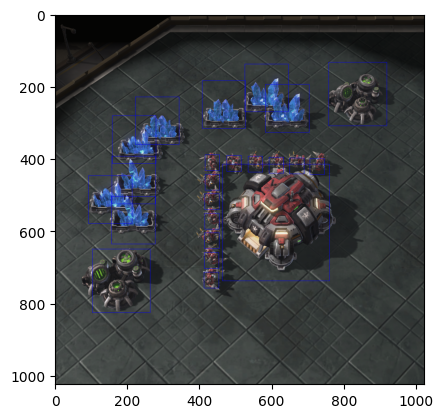

In [11]:
plt.imshow(img)
plt.show()